In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_data(df, ax=None):
    """
    Plots given Data Frame.
    Columns must be named 'x1', 'x2', 'y'.
    
    :df - pd.DataFrame
    :ax - matplotlib.axes._subplots.AxesSubplot
    """
    if not ax:
        f, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(df["x1"], df["x2"], c=df["y"], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlabel="$X_1$", ylabel="$X_2$")

In [3]:
def plot_contour_db(df, model, xx, yy, degree=1):
    """
    Plots contour decision boundary.
    
    :df - pd.DataFrame
    :model - sklearn.linear_model.LogisticRegression
    :xx - np.ndarray
    :yy - np.ndarray
    :degree - int
    """
    polynomial_features = PolynomialFeatures(degree)

    if degree > 1:
        grid = polynomial_features.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        grid = np.c_[xx.ravel(), yy.ravel()]

    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    plot_data(df, ax)
    plt.show()

In [4]:
def plot_linear_db(df, model, xx, yy, degree=1):
    """
    Plots linear decision boundary.

    :df - pd.DataFrame
    :model - sklearn.linear_model.LogisticRegression
    :xx - np.ndarray
    :yy - np.ndarray
    :degree - int
    """
    polynomial_features = PolynomialFeatures(degree)

    if degree > 1:
        grid = polynomial_features.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        grid = np.c_[xx.ravel(), yy.ravel()]

    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=0.5)

    plot_data(df, ax)
    plt.show()

In [5]:
df = pd.read_csv("./datasets/ex2data1.csv")
df.head(5)

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
X = df[["x1", "x2"]]
y = df[["y"]]

# converting y to 1d array
y = np.ravel(y)

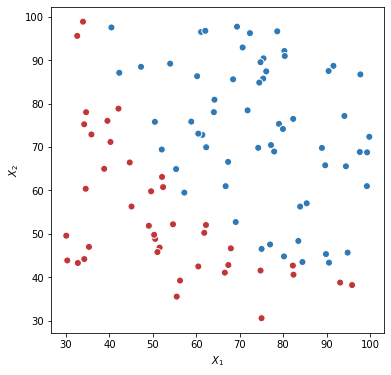

In [7]:
plot_data(df)

In [8]:
model = LogisticRegression(C=1)
model.fit(X, y)

LogisticRegression(C=1)

In [9]:
theta = np.ravel(np.c_[model.intercept_, model.coef_])
print(theta)

[-25.05219314   0.20535491   0.2005838 ]


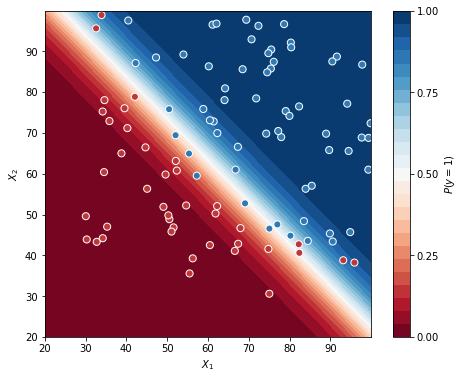

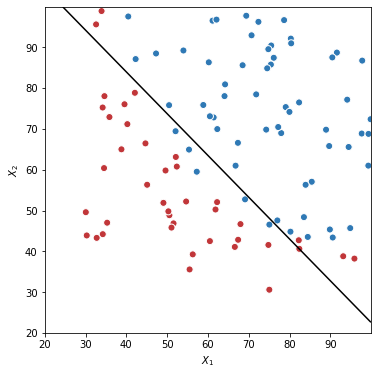

In [10]:
xx, yy = np.mgrid[20:100:.1, 20:100:.1]
plot_contour_db(df, model, xx, yy)
plot_linear_db(df, model, xx, yy)

In [11]:
df = pd.read_csv("./datasets/ex2data2.csv")
df.head(5)

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [12]:
X = df[["x1", "x2"]]
y = df["y"]

# converting y to 1d array
y = np.ravel(y)

In [13]:
# add polynomial degree to X
polynomial_features= PolynomialFeatures(degree=6)
X_poly = polynomial_features.fit_transform(X)

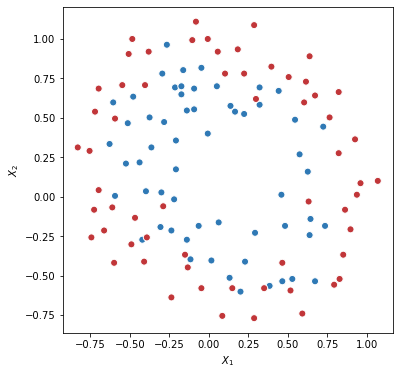

In [14]:
plot_data(df)

In [15]:
model = LogisticRegression(C=40, max_iter=400)
model.fit(X_poly, y)

LogisticRegression(C=40, max_iter=400)

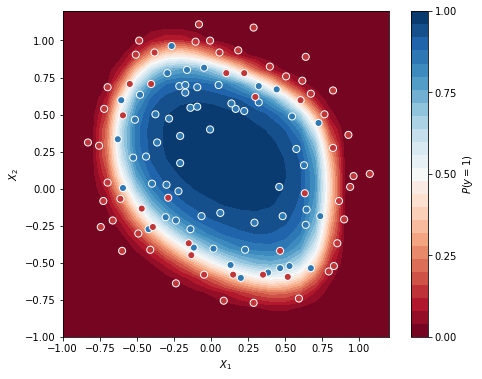

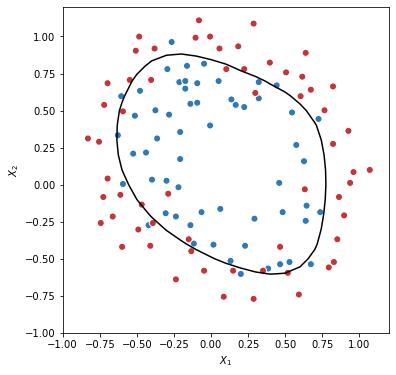

In [16]:
xx, yy = np.mgrid[-1:1.3:0.1, -1:1.3:0.1]
plot_contour_db(df, model, xx, yy, degree=6)
plot_linear_db(df, model, xx, yy, degree=6)